
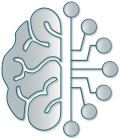

**Start at:** Tuesday 26 December 2023, 17:22:00  
**Hostname:** jarvis (Windows)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color
vID.init(cwd0)


# TCCM Homework:<br>**Quality rating of red wines by logistic regression**

<div class="intro">
    
<p style="text-align: center"><img width="650px" src="./DS4B-CO2-images/vinho-verde-header.jpg" style="margin-left:auto; margin-right:auto" id="img_vinho_verde"></p>
<br>

1. The purpose of this project is to **predict the quality** of Portuguese Vinho Verde wines based on their **physicochemical components**. The intent is to **replace a panel of wine tasters with an artificial neural network**.

2. Two **datasets** (one for white wines and the other for red wines) are downloadable on the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/wine+quality). The input variables (descriptors) are
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

Whereas the output variable, ***i.e.* the target**, is a 0 to 10 quality score, based on sensory data

3. **Bibliography**. There are two main references:
- An [original paper](https://doi.org/10.1016/j.dss.2009.05.016): Modeling wine preferences by data mining from physicochemical properties (**2009**), by Paulo Cortez, António Cerdeira, Fernando Almeida, Telmo Matos, José Reis, *Decision Support Systems* **47**: 547-553
- A [Wine Project github repository](https://github.com/kmspitzer/final-wineproject), at the core of the [Wine Quality website](https://ucsd-winequality.herokuapp.com/). Authors explored several classifiers: K Nearest Neighbors, Decision Tree, Random Forest, Random Forest Regressor, Stochastic Gradient Descent, Support Vector Classification, Linear Support Vector Classification, AdaBoost Classifier, Gradient Boost Classifier, XGB Classifier, and obtained 69% to 95% performance, the highest being from the Random Forest Regression, Random Forest, and XGBoost models.

Some useful pieces of codes will be found on the previous website as well as on the present pyPhysChem repository. If you analyze the ML notebooks carefully, you will see that some pieces of code such as automatic one-hot encoding etc... are available, although they might have not been used during the talktorials (see the [DS4B-Appendix.ipynb notebook](./DS4B-Appendix.ipynb) and the [tools4PytChem.py scripts](./config/tools4PytChem.py))

4. **Mandatory implementation**.
- The code will be developed in Python, in **this Jupyter notebook**, using mainly the Keras and Tensorflow ML libraries, although some ML SciKit Learn tools can also be used, if necessary.
- It will be commented both using **Markdown cells** and **Python block comments or inline comments**.
- No separate report is required, the **final present notebook** will be used both to evaluate the code and to explain the purpose of each section and how the results should be analyzed.
- Particular attention will be paid to the **organization of the notebook**: use headers, ordered or unordered list of items, tables, mathematical formulas, hyperlinks, images, ....
- As done in the [Wine Project available in github](https://github.com/kmspitzer/final-wineproject), **data will be cleaned and prepared**. A correlation matrix will plotted. You will do that separately for white and red wines. It could be interesting - or not -  to build a database mixing red and white wines, with a 12th descriptor for the wine color.
- You will try either a **simple ANN** and a **deep learning approach**. In addition to the accuracy of each tested ANN architecture, a **confusion matrix** would be helpful to better assess their performance.
- The numerical stability of the best model will be assessed using a **5-fold cross validation**.
</div>


<div class="rqT" title="Which libraries or skills do you need?">

- management of datas with `pandas`: see basic applications in the [iris1 notebook](./DS4B-Iris1.ipynb)
- definition and training of an ANN model with `keras`, such as done with the ["CO<sub>2</sub> solubility in ILs" notebook](DS4B-CO2_solubility-ANN.ipynb)
- look at the possibility to do a logistic regression, as done with the [identification of Iris species in the iris3 notebook](./DS4B-Iris3.ipynb)
- `matplotlib` and `seaborn` could be useful as well, to produce nice graphical analysis
- the `rdkit` library is not needed, as the various wines seem to differ only by the concentration of chemical compounds, not their nature

In [2]:
# Gianluca Regni 
# Import Libraries 
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
#import os
import tensorflow as tf
from termcolor import colored
from IPython.display import display
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from keras_tuner import RandomSearch
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

#import sys
#cwd0 = './config/'
#sys.path.append(cwd0)
#from visualID_Eng import color

print(colored('\nAll libraries imported succesfully.', 'green'))

# Libraries configurations

pd.options.mode.copy_on_write = True # Allow re-write on variable

print(colored('\nAll libraries Configed succesfully.', 'green'))



All libraries imported succesfully.

All libraries Configed succesfully.


In [3]:
# Collecting Data
# Import data by using pandas library

red_dataset = pd.read_csv('data/winequality-red.csv', sep=';')
white_dataset = pd.read_csv('data/winequality-white.csv', sep=';')

# Display the head of the red dataset
print("Red Wine Dataset:")
display(red_dataset.head())

# Display the head of the white dataset
print("\nWhite Wine Dataset:")
display(white_dataset.head())


Red Wine Dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



White Wine Dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Cleaning Datasets
# looking for null values
# dataset hasn't missing values (https://archive.ics.uci.edu/dataset/186/wine+quality) -- verified

print("Red Wine Dataset:")
print(red_dataset.info())

print("\nWhite Wine Dataset:")
print(white_dataset.info())

Red Wine Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

White Wine Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data col

**Note:** The dataset used does not have missing values. This has been verified, the dataset used is from the UCI Machine Learning Repository (Wine Quality Dataset). [Link to the dataset](https://archive.ics.uci.edu/dataset/186/wine+quality).

In [5]:
# Data informations for Red Wine
print("Red Wine:")
display(red_dataset.describe().T)

# Data informations for White Wine
print("\nWhite Wine:")
display(white_dataset.describe().T)


Red Wine:


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000



White Wine:


,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


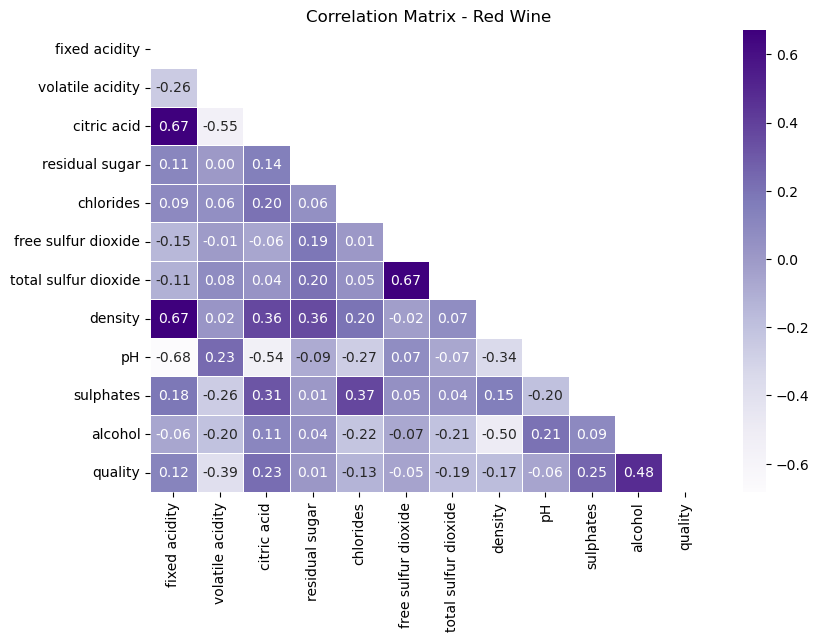

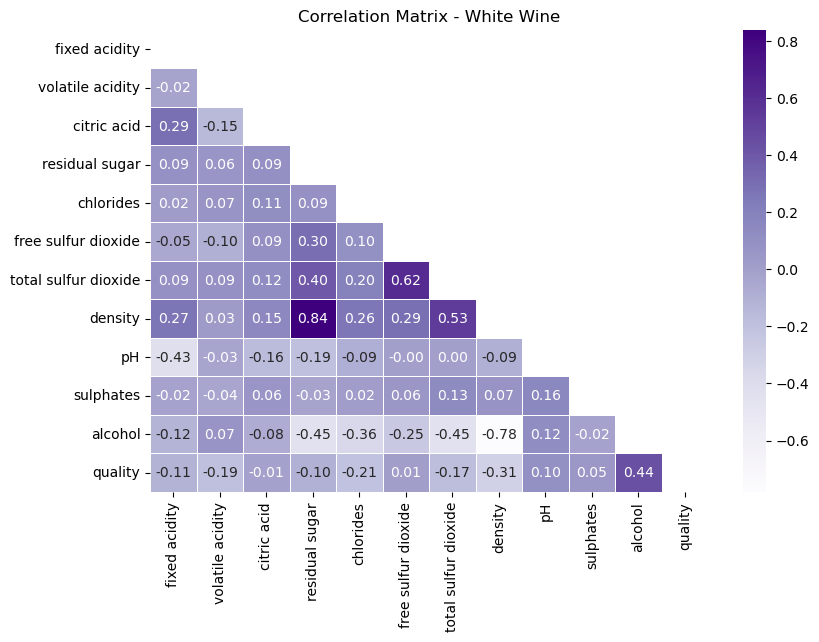

In [6]:
# let's build a correlation matrix to look for any strong correlations between features

red_corr = red_dataset.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(red_corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(red_corr))
plt.title('Correlation Matrix - Red Wine')
plt.show()

white_corr = white_dataset.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(white_corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(white_corr))
plt.title('Correlation Matrix - White Wine')
plt.show()

# Wine Characteristics Correlation Analysis

## Red Wine Correlation Matrix

### Positive Correlations:
- Fixed acidity and citric acid: 0.67
- Total sulfur dioxide and free sulfur dioxide: 0.67
- Density and fixed acidity: 0.67
- Alcohol and quality: 0.48

### Negative Correlations:
- Fixed acidity and pH: -0.68
- Volatile acidity and citric acid: -0.55
- Alcohol and density: -0.50

## White Wine Correlation Matrix

### Positive Correlations:
- Density and residual sugar: 0.84
- Density and total sulfur dioxide: 0.62
- Alcohol and quality: 0.44

### Negative Correlations:
- pH and fixed acidity: -0.43
- Alcohol and density: -0.78
- Alcohol and residual sugar: -0.45
- Density and quality: -0.31

*Note: Consider reducing the number of features by using only one of the two that correlate.*


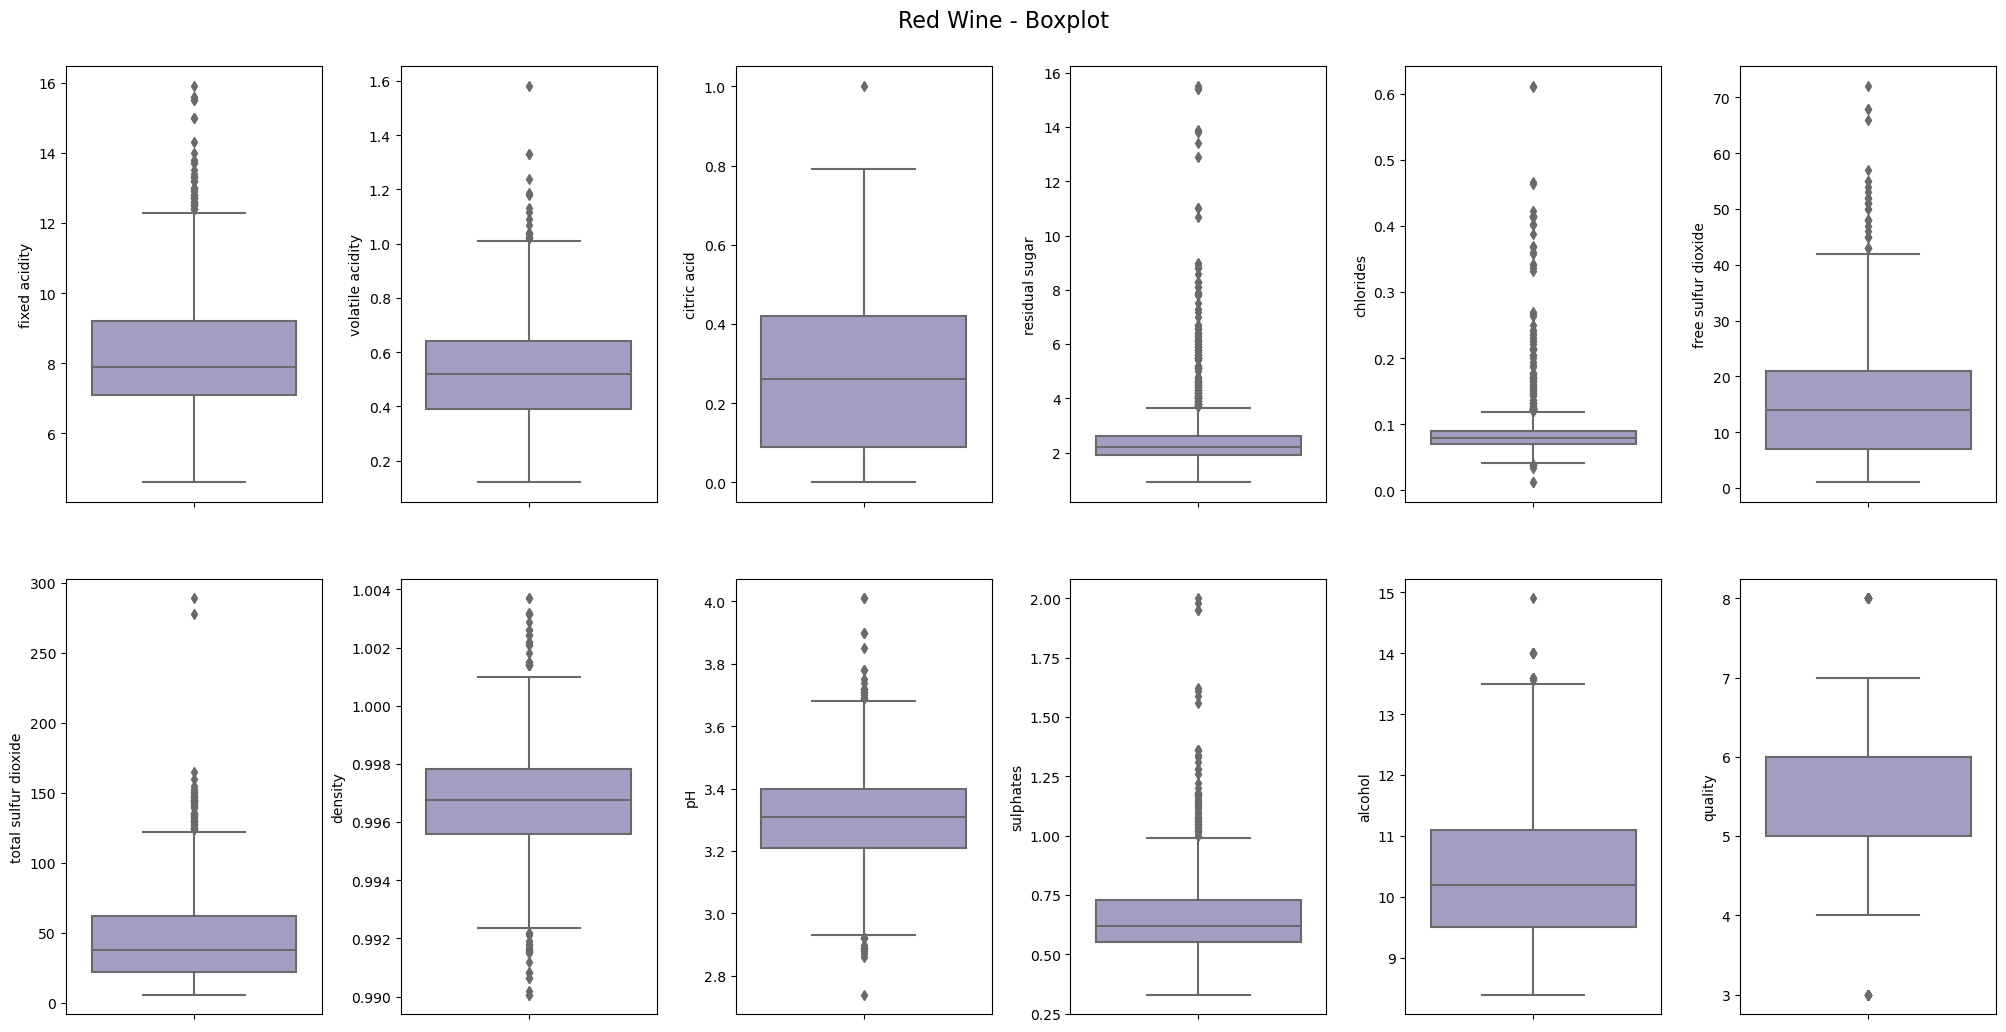

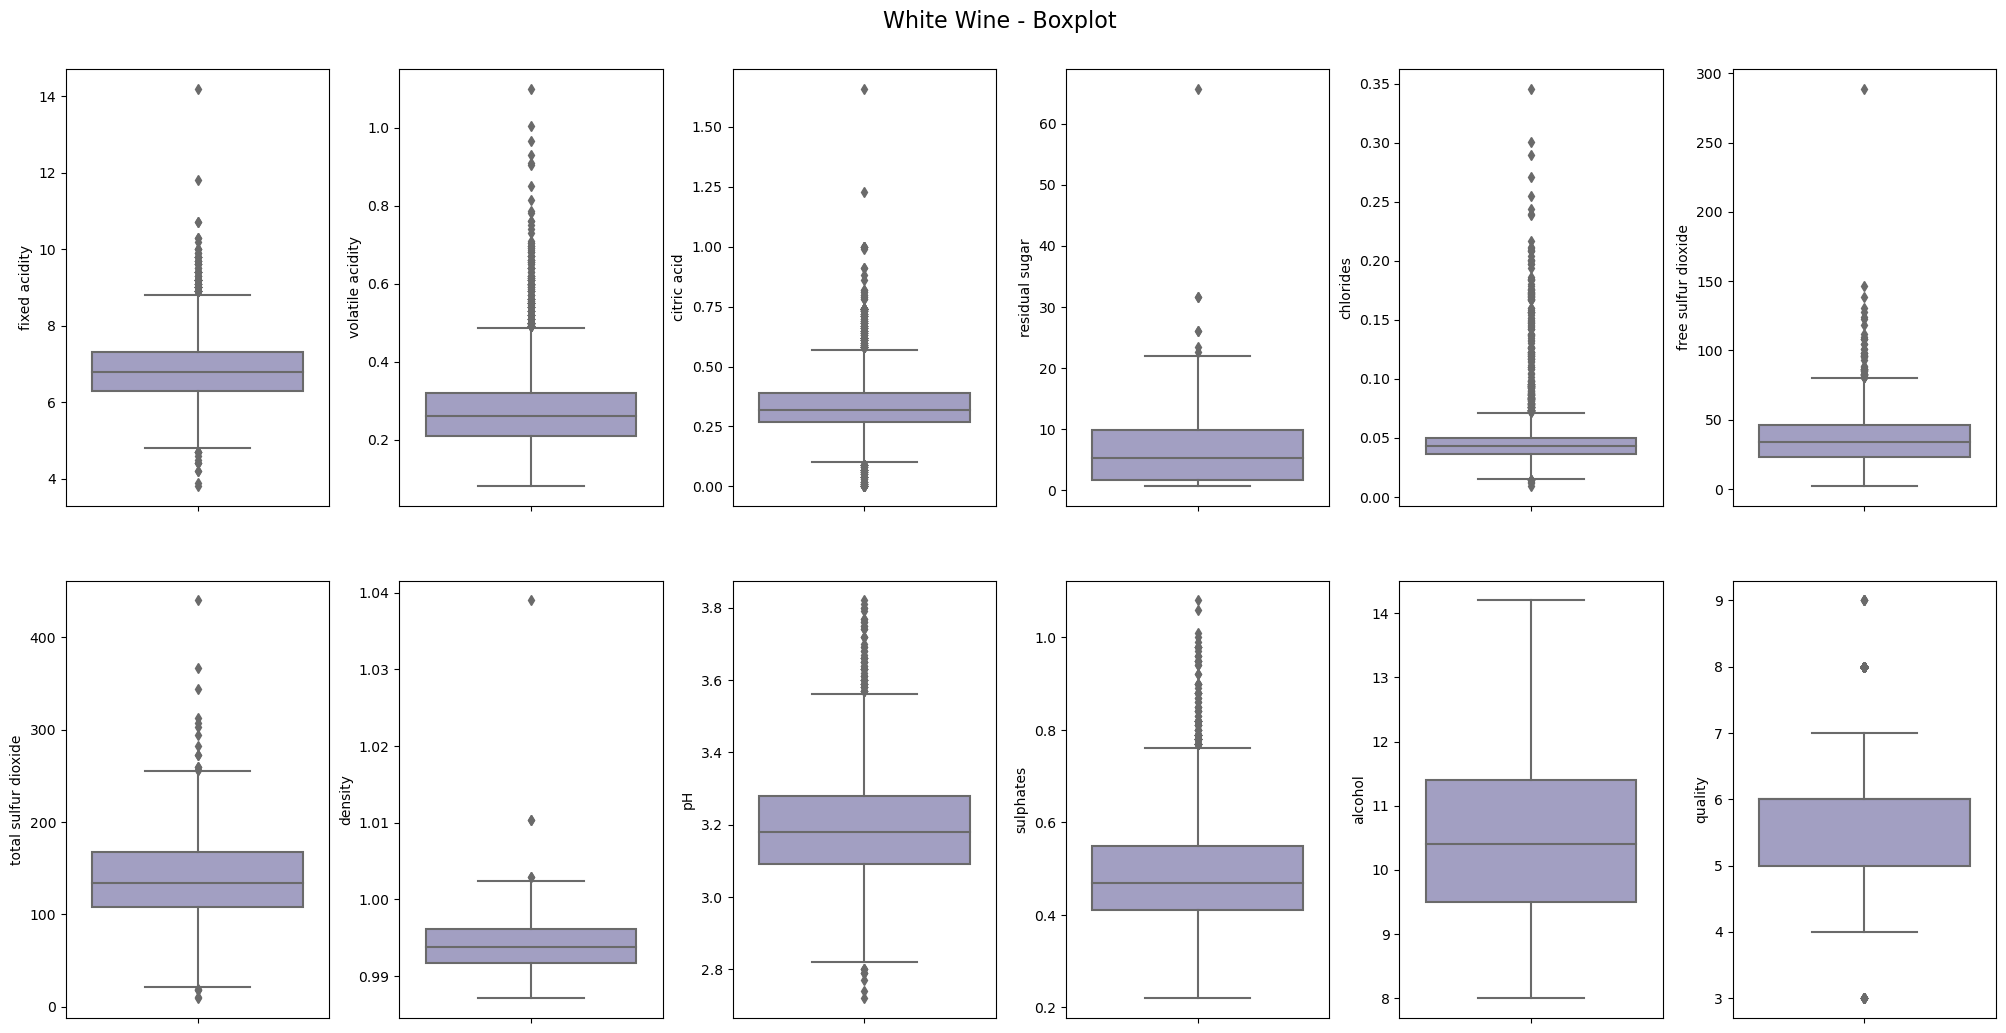

In [7]:
# Let's see if there are outliers for Red Wine
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for col, value in red_dataset.items():
    sns.boxplot(y=col, data=red_dataset, ax=ax[index], palette='Purples')
    index += 1

fig.suptitle("Red Wine - Boxplot", fontsize=16, y=1.02)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Let's see if there are outliers for White Wine
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for col, value in white_dataset.items():
    sns.boxplot(y=col, data=white_dataset, ax=ax[index], palette='Purples')
    index += 1

fig.suptitle("White Wine - Boxplot ", fontsize=16, y=1.02)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


## Outliers

From the above graphs, we can observe the presence of outliers in the data. However, for the purpose of this analysis, these outliers will not be removed. We aim to consider the entire dataset to maintain the integrity of the original data and to observe the effects of all variables, including those that are outliers. In future analyses, it could be interesting to explore how the results might change if these outliers were to be excluded.


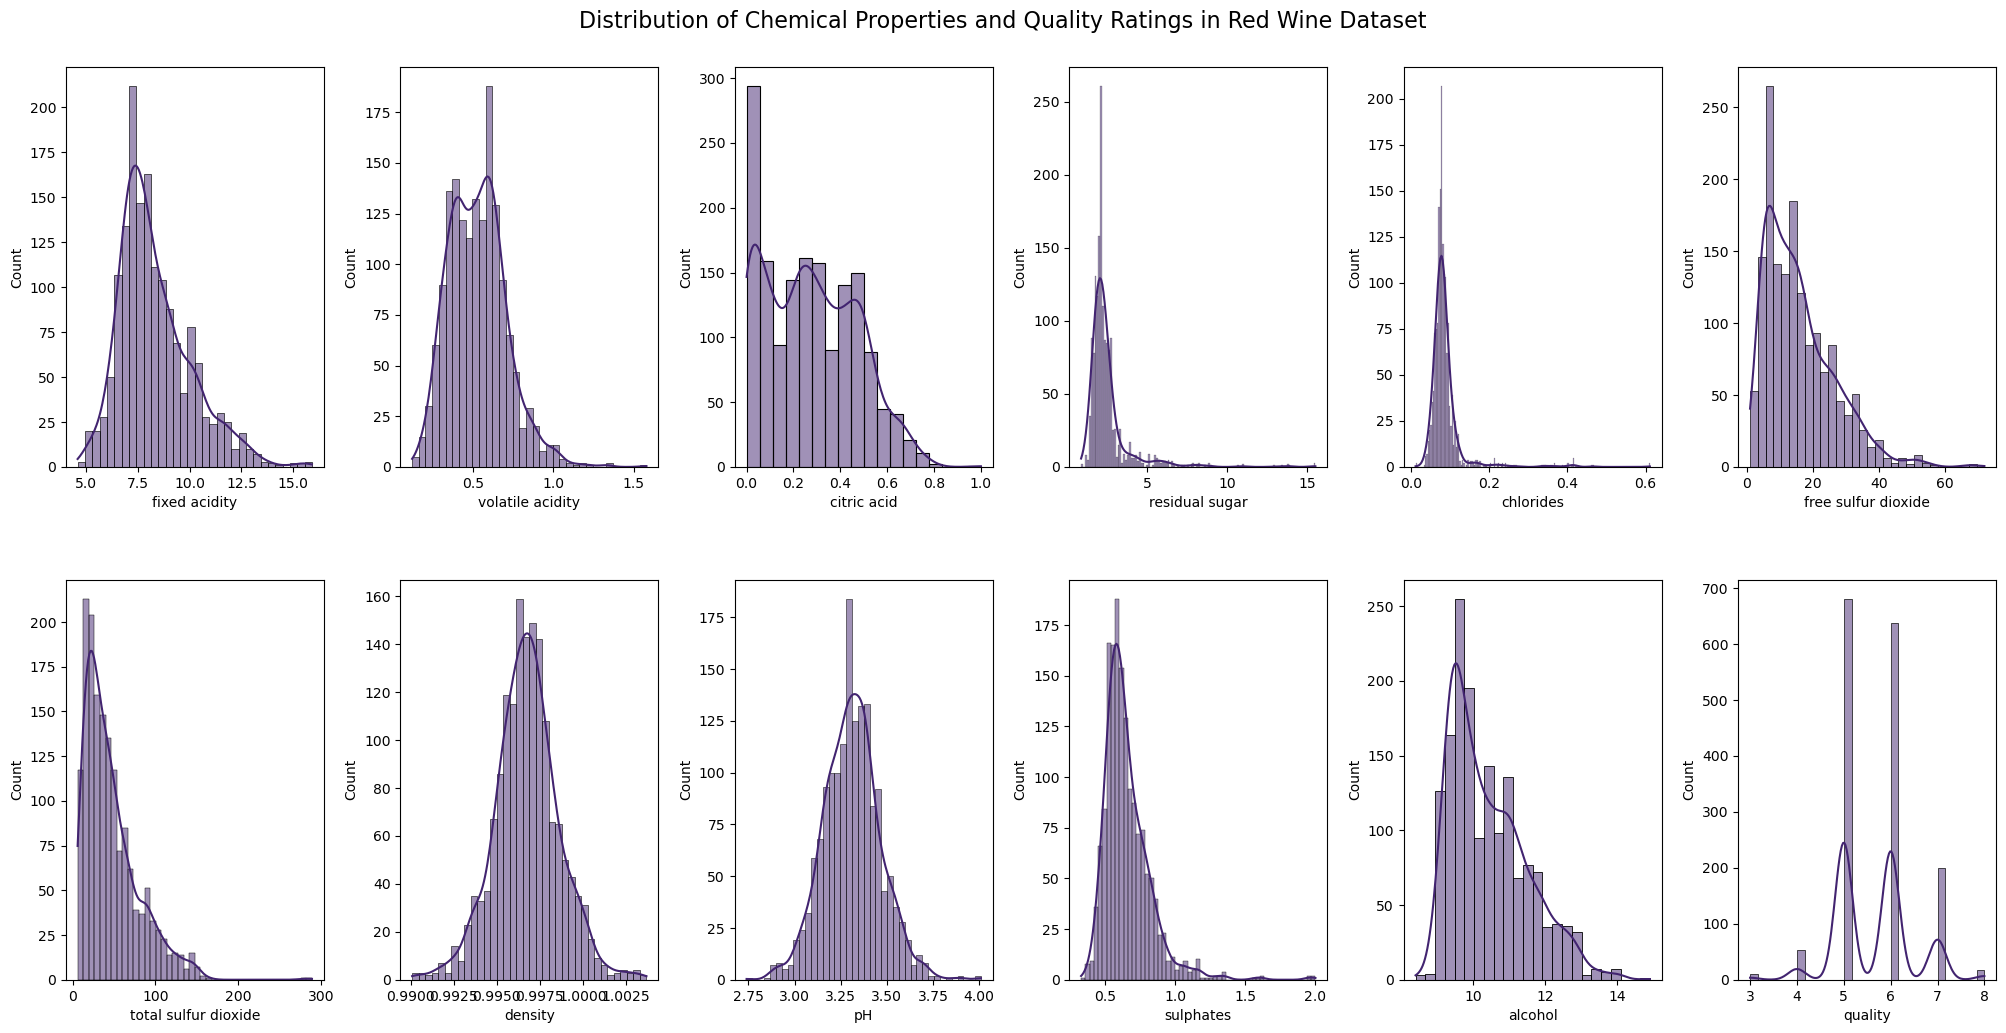

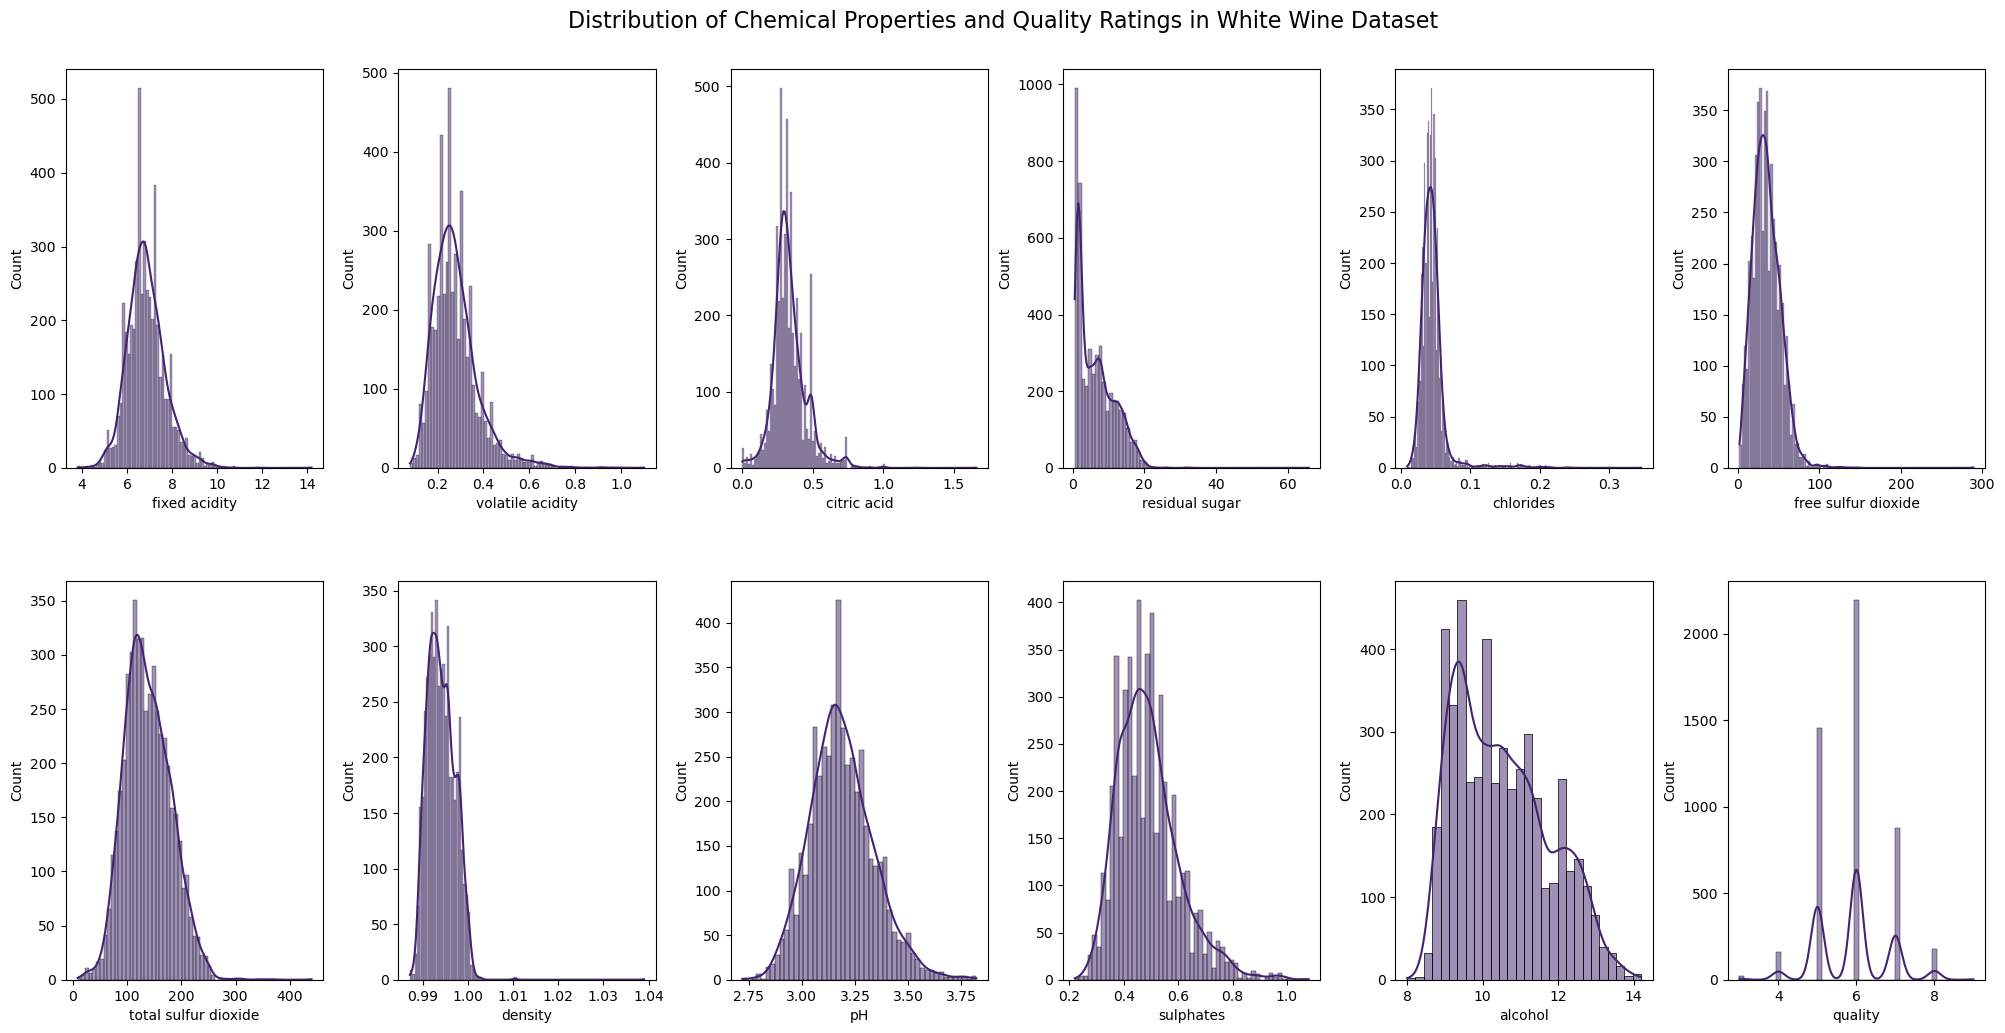

In [8]:
# Looking at the distributions for Red Wine
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for col, value in red_dataset.items():
    sns.histplot(value, ax=ax[index], color="#422470", kde=True)
    index += 1

fig.suptitle("Distribution of Chemical Properties and Quality Ratings in Red Wine Dataset", fontsize=16, y=1.02)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Looking at the distributions for White Wine
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for col, value in white_dataset.items():
    sns.histplot(value, ax=ax[index], color="#422470", kde=True)
    index += 1

fig.suptitle("Distribution of Chemical Properties and Quality Ratings in White Wine Dataset", fontsize=16, y=1.02)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


### Fixed Acidity:

- In red wine, the fixed acidity appears to have a distribution that is slightly right-skewed.
- In white wine, the distribution of fixed acidity appears more symmetrical compared to red wine but still shows a slight rightward skew.

### Volatile Acidity:

- Both datasets show a distribution with a long tail to the right, indicating the presence of higher value outliers.

### Citric Acid:

- The values in red wine are clustered closer to zero compared to white wine, which displays a broader distribution with a tail to the right.

### Residual Sugar:

- White wine shows a distribution with a much longer tail to the right compared to red wine, suggesting that white wines tend to have higher amounts of residual sugar.

### Chlorides:

- Both graphs indicate a right-skewed distribution with potential outliers.

### Free Sulfur Dioxide and Total Sulfur Dioxide:

- The distribution in both types of wine shows a tail to the right, with white wine exhibiting higher values compared to red wine, especially for free sulfur dioxide.

### Density:

- Density shows nearly normal distributions in both datasets, with white wine displaying a slight skew towards higher values.

### pH:

- The pH distributions are similar for both wines, with an approximately symmetrical shape centered around 3.2-3.3.

### Sulphates:

- Both red and white wines exhibit a right-skewed distribution with a long tail to the right.

### Alcohol:

- The distribution of alcohol is broader in red wine compared to white wine.

### Quality:

- The quality of the wine is shown as a categorical variable. It is observed that most wines are concentrated around the medium quality categories, with few wines in the highest or lowest categories. White wine seems to have a greater number of wines with higher quality ratings compared to red wine.


In general, both datasets exhibit distributions that suggest the presence of outliers. These outliers could be important for understanding the full characteristics of the data and therefore are not removed in this analysis. However, exploring the impact of their removal might be an interesting step for future analyses.


Red Wine Counts
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

White Wine Counts
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


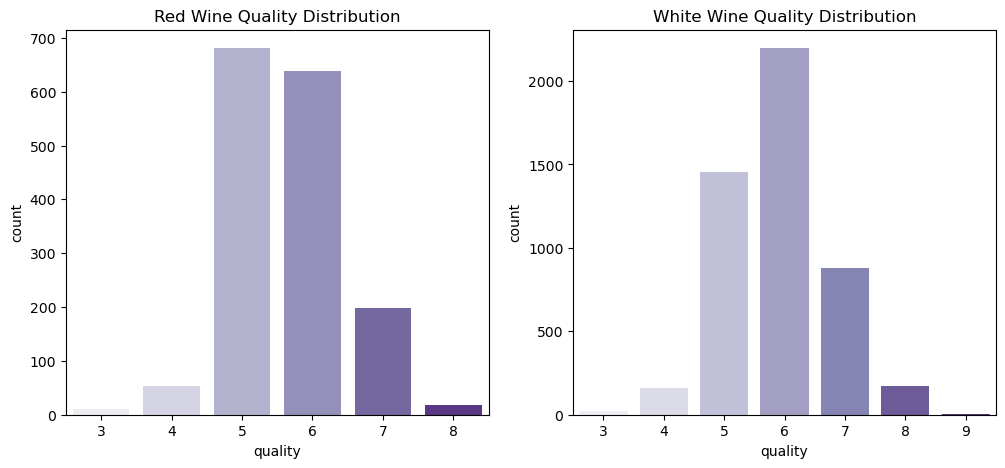

In [9]:
# Quality distribution

# Data for Red Wine
quality_counts_red = red_dataset['quality'].value_counts().sort_index()
print("Red Wine Counts")
print(quality_counts_red)

# Data for White Wine
quality_counts_white = white_dataset['quality'].value_counts().sort_index()
print("\nWhite Wine Counts")
print(quality_counts_white)

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Red Wine Plot
sns.countplot(x='quality', data=red_dataset, palette='Purples', ax=axes[0])
axes[0].set_title("Red Wine Quality Distribution")

# White Wine Plot
sns.countplot(x='quality', data=white_dataset, palette='Purples', ax=axes[1])
axes[1].set_title("White Wine Quality Distribution")

# Show the plots
plt.show()


# Class Imbalance Issues in Wine Quality Datasets

Analyzing the quality distribution of red and white wine datasets reveals an imbalance in class distribution. This phenomenon occurs when some classes have many more samples than others. This uneven distribution can lead to several problems when training machine learning models.

## Effects of Class Imbalance

- **Bias Towards Majority Classes**: ANNs might develop a bias towards classes with more samples because the error contributed by these classes will dominate during training.
- **Reduced Generalization Capability**: Minority classes may be underrepresented in the resulting model, leading to poor generalization and performance when the model encounters data from these underrepresented classes in real-world scenarios.
- **Misleading Evaluation**: Standard evaluation metrics like accuracy may not reflect the true performance of the model on minority classes, resulting in a misleading assessment of the model's capacity.


In [10]:
# Red Wine
# create a column and place data into 3 quality buckets
red_dataset.loc[red_dataset["quality"] <= 4, "quality_label"] = 'Poor'
red_dataset.loc[((red_dataset["quality"] > 4) & (red_dataset["quality"] < 7)), "quality_label"] = 'Good'
red_dataset.loc[red_dataset["quality"] >= 7, "quality_label"] = 'Excellent'

# Display the head of the red dataset
print("Red Wine Dataset:")
display(red_dataset.head())

# White Wine
# create a column and place data into 3 quality buckets
white_dataset.loc[white_dataset["quality"] <= 4, "quality_label"] = 'Poor'
white_dataset.loc[((white_dataset["quality"] > 4) & (white_dataset["quality"] < 7)), "quality_label"] = 'Good'
white_dataset.loc[white_dataset["quality"] >= 7, "quality_label"] = 'Excellent'

# Display the head of the white dataset
print("\nWhite Wine Dataset:")
display(white_dataset.head())

Red Wine Dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Good



White Wine Dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Good
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Good


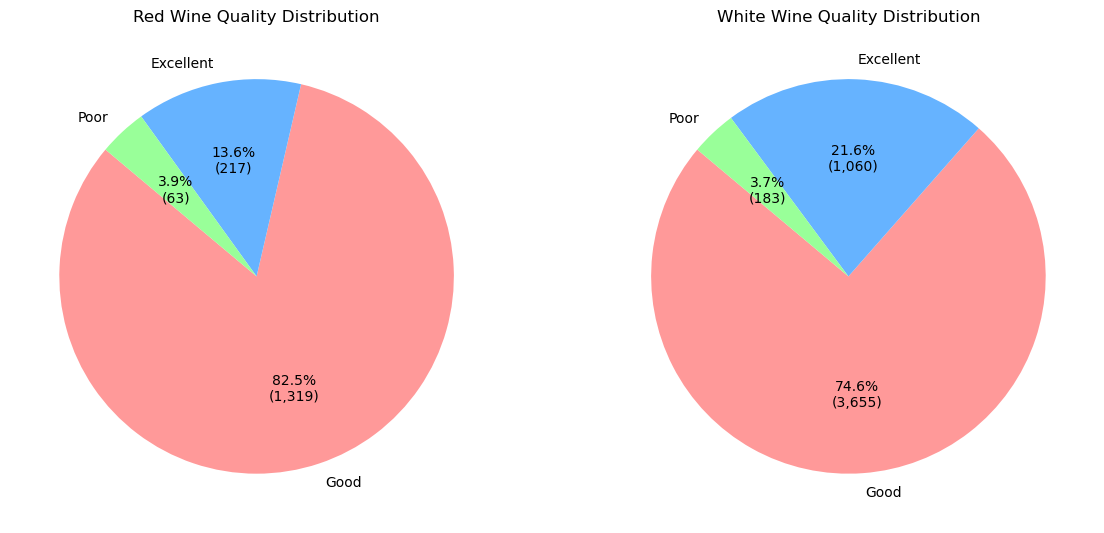

In [11]:
# Quality categories distribution

# Function to create a pie chart
def plot_pie_chart(data, title, ax):
    # Calculate the percentages and the number of values for each category
    counts = data.value_counts()  # Get counts of each category
    labels = counts.index  # Category labels
    sizes = counts.values  # Counts of each category

    # Create the pie chart
    # The 'autopct' parameter formats the labels with both percentage and actual value
    ax.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%\n({:,.0f})'.format(p, p * sum(sizes) / 100),
           startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    ax.set_title(title)  # Set the title of the subplot

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Red Wine
plot_pie_chart(red_dataset['quality_label'], "Red Wine Quality Distribution", axes[0])

# Pie chart for White Wine
plot_pie_chart(white_dataset['quality_label'], "White Wine Quality Distribution", axes[1])

# Display the plots
plt.show()


In [12]:
# Define a direct mapping for labels
label_mapping = {'Poor': 0, 'Good': 1, 'Excellent': 2}

# Apply the mapping to the 'quality_label' column in red_dataset
# This will convert categorical labels "Poor", "Good", "Excellent" into 0, 1, 2 respectively
red_dataset['quality_label'] = red_dataset['quality_label'].map(label_mapping)
print("Red Wine")
# Display the first and last 3 rows to verify the changes
display(red_dataset)

# Apply the same mapping to the 'quality_label' column in white_dataset
# This will also convert categorical labels into numerical format as specified in the mapping
white_dataset['quality_label'] = white_dataset['quality_label'].map(label_mapping)
print("\nWhite Wine")
# Display the first and last 3 rows to verify the changes
display(white_dataset)


Red Wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1



White Wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2


## Mapping in Data Transformation

Mapping refers to the technique of converting categorical labels into numerical values. This process is especially valuable when dealing with ordinal data, where categories possess a natural order, such as our quality labels.

**Why Use Mapping?**
- *Machine Learning Compatibility*: Many machine learning algorithms demand numerical input. Mapping facilitates the conversion of categorical data into a format compatible with these algorithms.
- *Simplicity and Efficiency*: It streamlines datasets by substituting diverse string labels with integers, resulting in more accessible and efficient data manipulation.



In [13]:
# X are the features and y is the target
X_red = red_dataset.drop(columns=['quality', 'quality_label'])
y_red = red_dataset.quality_label

X_white = white_dataset.drop(columns=['quality', 'quality_label'])
y_white = white_dataset.quality_label

display(X_red, y_red)
display(X_white, y_white)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality_label, Length: 1599, dtype: int64

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    1
4895    1
4896    2
4897    1
Name: quality_label, Length: 4898, dtype: int64

In [14]:
# Normalization

# Normalization for Red Wine Dataset
print("Red Wine Dataset:")
scaler_red = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_red)
X_red = pd.DataFrame(scaler_red, columns=X_red.columns)
display(X_red.describe().T)

# Normalization for White Wine Dataset
print("\nWhite Wine Dataset:")
scaler_white = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_white)
X_white = pd.DataFrame(scaler_white, columns=X_white.columns)
display(X_white.describe().T)


Red Wine Dataset:


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,0.329171,0.154079,0.0,0.221239,0.292035,0.407080,1.0
volatile acidity,1599.0,0.279329,0.122644,0.0,0.184932,0.273973,0.356164,1.0
citric acid,1599.0,0.270976,0.194801,0.0,0.090000,0.260000,0.420000,1.0
residual sugar,1599.0,0.112247,0.096570,0.0,0.068493,0.089041,0.116438,1.0
chlorides,1599.0,0.125988,0.078573,0.0,0.096828,0.111853,0.130217,1.0
free sulfur dioxide,1599.0,0.209506,0.147326,0.0,0.084507,0.183099,0.281690,1.0
total sulfur dioxide,1599.0,0.142996,0.116238,0.0,0.056537,0.113074,0.197880,1.0
density,1599.0,0.490211,0.138571,0.0,0.406021,0.490455,0.570117,1.0
pH,1599.0,0.449695,0.121564,0.0,0.370079,0.448819,0.519685,1.0
sulphates,1599.0,0.196496,0.101501,0.0,0.131737,0.173653,0.239521,1.0



White Wine Dataset:


,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,0.293730,0.081141,0.0,0.240385,0.288462,0.336538,1.0
volatile acidity,4898.0,0.194354,0.098818,0.0,0.127451,0.176471,0.235294,1.0
citric acid,4898.0,0.201320,0.072903,0.0,0.162651,0.192771,0.234940,1.0
residual sugar,4898.0,0.088825,0.077792,0.0,0.016871,0.070552,0.142638,1.0
chlorides,4898.0,0.109117,0.064831,0.0,0.080119,0.100890,0.121662,1.0
free sulfur dioxide,4898.0,0.116056,0.059258,0.0,0.073171,0.111498,0.153310,1.0
total sulfur dioxide,4898.0,0.300141,0.098603,0.0,0.229698,0.290023,0.366589,1.0
density,4898.0,0.133360,0.057662,0.0,0.088924,0.127820,0.173318,1.0
pH,4898.0,0.425697,0.137273,0.0,0.336364,0.418182,0.509091,1.0
sulphates,4898.0,0.313775,0.132704,0.0,0.220930,0.290698,0.383721,1.0


### Normalization

Normalize X data (features) is good to decrease effect of large numbers on the analysis. Moreover this approach makes it easier to deal with the data and it helps in speeding up the convergences.

In [15]:
sm = SMOTE()

# Apply SMOTE to the datasets
X_red_sm, y_red_sm = sm.fit_resample(X_red, y_red)
X_white_sm, y_white_sm = sm.fit_resample(X_white, y_white)

# Display the quality distributions before and after applying SMOTE
print("Red Wine")
print("Quality Distribution Before SMOTE Operation : \n", y_red.value_counts().sort_index(), "\n")
print("Quality Distribution After SMOTE Operation : \n", y_red_sm.value_counts().sort_index())

print("\nWhite Wine")
print("Quality Distribution Before SMOTE Operation : \n", y_white.value_counts().sort_index(), "\n")
print("Quality Distribution After SMOTE Operation : \n", y_white_sm.value_counts().sort_index())


Red Wine
Quality Distribution Before SMOTE Operation : 
 0      63
1    1319
2     217
Name: quality_label, dtype: int64 

Quality Distribution After SMOTE Operation : 
 0    1319
1    1319
2    1319
Name: quality_label, dtype: int64

White Wine
Quality Distribution Before SMOTE Operation : 
 0     183
1    3655
2    1060
Name: quality_label, dtype: int64 

Quality Distribution After SMOTE Operation : 
 0    3655
1    3655
2    3655
Name: quality_label, dtype: int64


# Balancing the dataset with SMOTE

Our dataset had significant class imbalance, especially in 'Poor' and 'Excellent' categories. To address this, we applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.



In [16]:
# Creation of training and test set
# split data into training and testing data, with a 80%-20% split

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red_sm, y_red_sm, test_size=.20, random_state=0)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white_sm, y_white_sm, test_size=.20, random_state=0)

# Uncomment belows lines if you want to check training and test set
# display(X_red_train, y_red_train)
# display(X_red_test, y_red_test)
# display(X_white_train, y_white_train)
# display(X_white_test, y_white_test)

In [17]:
# Classification models

lr = LogisticRegression(max_iter=1000)
rfc = RandomForestClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
gnb = GaussianNB()

lr.fit(X_red_train, y_red_train)
rfc.fit(X_red_train, y_red_train)
svc.fit(X_red_train, y_red_train)
dtc.fit(X_red_train, y_red_train)
knc.fit(X_red_train, y_red_train)
gnb.fit(X_red_train, y_red_train)

print("Accuracy Score (LogisticRegression) :",lr.score(X_red_test, y_red_test))
print("Accuracy Score (RandomForestClassifier) :",rfc.score(X_red_test, y_red_test))
print("Accuracy Score (SVC):",svc.score(X_red_test, y_red_test))
print("Accuracy Score (DecisionTreeClassifier):",dtc.score(X_red_test, y_red_test))
print("Accuracy Score (KNeighborsClassifier):",knc.score(X_red_test, y_red_test))
print("Accuracy Score (GaussianNB):",gnb.score(X_red_test, y_red_test))


Accuracy Score (LogisticRegression) : 0.7070707070707071
Accuracy Score (RandomForestClassifier) : 0.9545454545454546
Accuracy Score (SVC): 0.7941919191919192
Accuracy Score (DecisionTreeClassifier): 0.8876262626262627
Accuracy Score (KNeighborsClassifier): 0.8775252525252525
Accuracy Score (GaussianNB): 0.6477272727272727


The RandomForestClassifier is the model that showed the best performance among those tested.

In [18]:
# Check before one-hot encoding
print("Red Wine")
print("Training set shape:", y_red_train.shape)
print("First 3 samples in training set:\n", y_red_train[:3])
print("\nTest set shape:", y_red_test.shape)
print("First 3 samples in test set:\n", y_red_test[:3])

print("\nWhite Wine")
print("Training set shape:", y_white_train.shape)
print("First 3 samples in training set:\n", y_white_train[:3])
print("\nTest set shape:", y_white_test.shape)
print("First 3 samples in test set:\n", y_white_test[:3])

# Convert labels to one-hot encoding format.
# This is necessary for multi-class classification with a neural network.
y_red_train = to_categorical(y_red_train, num_classes=3)
y_red_test = to_categorical(y_red_test, num_classes=3)
y_white_train = to_categorical(y_white_train, num_classes=3)
y_white_test = to_categorical(y_white_test, num_classes=3)

# Check one-hot encoding and the shape of the datasets
print("Red Wine")
print("Training set shape:", y_red_train.shape)
print("First 3 samples in training set:\n", y_red_train[:3])
print("\nTest set shape:", y_red_test.shape)
print("First 3 samples in test set:\n", y_red_test[:3])

print("\nWhite Wine")
print("Training set shape:", y_white_train.shape)
print("First 3 samples in training set:\n", y_white_train[:3])
print("\nTest set shape:", y_white_test.shape)
print("First 3 samples in test set:\n", y_white_test[:3])


Red Wine
Training set shape: (3165,)
First 3 samples in training set:
 3713    2
713     1
3819    2
Name: quality_label, dtype: int64

Test set shape: (792,)
First 3 samples in test set:
 3256    2
142     1
2623    0
Name: quality_label, dtype: int64

White Wine
Training set shape: (8772,)
First 3 samples in training set:
 10224    2
5755     0
1514     2
Name: quality_label, dtype: int64

Test set shape: (2193,)
First 3 samples in test set:
 10927    2
9281     2
6676     0
Name: quality_label, dtype: int64
Red Wine
Training set shape: (3165, 3)
First 3 samples in training set:
 [[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]

Test set shape: (792, 3)
First 3 samples in test set:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]

White Wine
Training set shape: (8772, 3)
First 3 samples in training set:
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]

Test set shape: (2193, 3)
First 3 samples in test set:
 [[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [19]:
# ANN - Definition and Tuning for Classification

def ANNmodel(hp):
    model = Sequential()

    # Input layer with 11 neurons (one for each chemical feature)
    model.add(layers.Dense(11, activation='relu', input_shape=(11,)))

    # Single hidden layer with tunable number of neurons
    model.add(layers.Dense(
        units=hp.Choice('units_hidden_layer', [4, 7, 16]),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1)))

    # Output layer for multiclass classification with 3 neurons (one for each class)
    model.add(layers.Dense(3, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Ensure that the directory exists
directory = 'C:/mydir/ANN/'
if not os.path.exists(directory):
    os.makedirs(directory)

# Red Wine Model
ANNred_tuner = RandomSearch(
    ANNmodel, 
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory=os.path.normpath(directory),
    project_name='redwine'
)

ANNred_tuner.search(X_red_train, y_red_train,
                 epochs=50,
                 batch_size=32,
                 validation_data=(X_red_test, y_red_test)
                 )

# Get the best red wine model
best_red_ANNmodel = ANNred_tuner.get_best_models(num_models=1)[0]
best_red_ANNmodel.save('C:/mydir/ANN/bestmodel/red/')

# Tuning for White Wine
ANNwhite_tuner = RandomSearch(
    ANNmodel,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory=os.path.normpath(directory),
    project_name='whitewine'
)

ANNwhite_tuner.search(X_white_train, y_white_train,
                   epochs=100,
                   batch_size=64,
                   validation_data=(X_white_test, y_white_test)
                   )

# Get the best white wine model
best_white_ANNmodel = ANNwhite_tuner.get_best_models(num_models=1)[0]
best_white_ANNmodel.save('C:/mydir/ANN/bestmodel/white/')
#best_white_ANNmodel_CV = ANNwhite_tuner.get_best_models(num_models=1)[0] # for cross validation

# Print a summary of the best ANN model for red wine
print("Best Red Wine ANN Model Summary:")
best_red_ANNmodel.summary()

# Print the hyperparameters of the best ANN model for red wine
best_red_ANNhyperparameters = ANNred_tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters for red wine ANN model:")
print(best_red_ANNhyperparameters.values)

# Evaluate the best model on the test set and print the accuracy
best_red_accuracy = best_red_ANNmodel.evaluate(X_red_test, y_red_test)[1]
print(f"Best Red Wine Model ANN Accuracy: {best_red_accuracy:.2f}")

# Print a summary of the best ANN model for white wine
print("Best White Wine ANN Model Summary:")
best_white_ANNmodel.summary()

# Print the hyperparameters of the best ANN model for white wine
best_white_ANNhyperparameters = ANNwhite_tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters for white wine ANN model:")
print(best_white_ANNhyperparameters.values)

# Evaluate the best model on the test set and print the accuracy
best_white_accuracy = best_white_ANNmodel.evaluate(X_white_test, y_white_test)[1]
print(f"Best White Wine ANN Model Accuracy: {best_white_accuracy:.2f}")



Reloading Tuner from C:\mydir\ANN\redwine\tuner0.json


INFO:tensorflow:Assets written to: C:/mydir/ANN/bestmodel/red/assets


INFO:tensorflow:Assets written to: C:/mydir/ANN/bestmodel/red/assets


Reloading Tuner from C:\mydir\ANN\whitewine\tuner0.json
INFO:tensorflow:Assets written to: C:/mydir/ANN/bestmodel/white/assets


INFO:tensorflow:Assets written to: C:/mydir/ANN/bestmodel/white/assets


Best Red Wine ANN Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 7)                 84        
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 24        
                                                                 
Total params: 240 (960.00 Byte)
Trainable params: 240 (960.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Best hyperparameters for red wine ANN model:
{'units_hidden_layer': 7, 'dropout': 0.2}



25/25 [==============================] - 0s 996us/step - loss: 0.6254 - accuracy: 0.7348
Best Red Wine Model ANN Accuracy: 0.73
Best White Wine ANN Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 16)                192       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 375 (1.46 KB)
Trainable params: 375 (1.46 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________________________________________________

## Red Wine Model (ANN)

**Accuracy:** 74%

**Best Hyperparameters:**
- Units in Hidden Layer: 7
- Dropout: 0.2

**Model Summary:**
- Input Layer: 11 neurons
- Hidden Layer: 7 neurons (ReLU activation)
- Dropout Rate: 0.2
- Output Layer: 3 neurons (Softmax activation)


---

## White Wine Model (ANN)

**Accuracy:** 74%

**Best Hyperparameters:**
- Units in Hidden Layer: 16
- Dropout: 0.2

**Model Summary:**
- Input Layer: 11 neurons
- Hidden Layer: 16 neurons (ReLU activation)
- Dropout Rate: 0.2
- Output Layer: 3 neurons (Softmax activation)


In [20]:
# ANN - Training

# EarlyStopping callback for Red Wine
early_stopping_red = callbacks.EarlyStopping(
        monitor='val_loss',
        mode='min',
        patience=15,
        restore_best_weights=True
)

# EarlyStopping callback for White Wine
early_stopping_white = callbacks.EarlyStopping(
        monitor='val_loss',
        mode='min',
        patience=20,
        restore_best_weights=True  
)

# Function to save training history
def save_history(history, path):
    with open(path, 'w') as file:
        json.dump(history.history, file)

# Function to load training history
def load_history(path):
    with open(path, 'r') as file:
        return json.load(file)

# Paths for models and histories
ANNmodel_path_red = directory + 'best_red_ANNmodel.keras'
ANNhistory_path_red = directory + 'best_red_ANNhistory.json'

ANNmodel_path_white = directory + 'best_white_ANNmodel.keras'
ANNhistory_path_white = directory + 'best_white_ANNhistory.json'

# Training and saving the model and history for Red Wine
if not os.path.exists(ANNmodel_path_red):
    ANNhistory_red = best_red_ANNmodel.fit(
        X_red_train, y_red_train,
        epochs=500, batch_size=32, verbose=1,
        validation_data=(X_red_test, y_red_test),
        callbacks=[early_stopping_red]
    )
    # Save the trained model
    best_red_ANNmodel.save(ANNmodel_path_red)
    # Save the history
    save_history(ANNhistory_red, ANNhistory_path_red)
else:
    print("Model for Red Wine already trained and saved.")
    # Load the model if the model was already trained
    best_red_ANNmodel = load_model(ANNmodel_path_red)
    # Load the history if the model was already trained
    ANNhistory_red = load_history(ANNhistory_path_red)

# Training and saving the model and history for White Wine
if not os.path.exists(ANNmodel_path_white):
    ANNhistory_white = best_white_ANNmodel.fit(
        X_white_train, y_white_train,
        epochs=600, batch_size=64, verbose=1,
        validation_data=(X_white_test, y_white_test),
        callbacks=[early_stopping_white]
    )
    # Save the trained model
    best_white_ANNmodel.save(ANNmodel_path_white)
    # Save the history
    save_history(ANNhistory_white, ANNhistory_path_white)
else:
    print("Model for White Wine already trained and saved.")
    # Load the model if the model was already trained
    best_white_ANNmodel = load_model(ANNmodel_path_white)
    # Load the history if the model was already trained
    ANNhistory_white = load_history(ANNhistory_path_white)


Model for Red Wine already trained and saved.
Model for White Wine already trained and saved.


Red Wine



Train / Loss: 0.4690
Train / Accuracy: 0.8098
Test / Loss: 0.4958
Test / Accuracy: 0.7992

White Wine
Train / Loss: 0.5280
Train / Accuracy: 0.7790
Test / Loss: 0.5292
Test / Accuracy: 0.7829


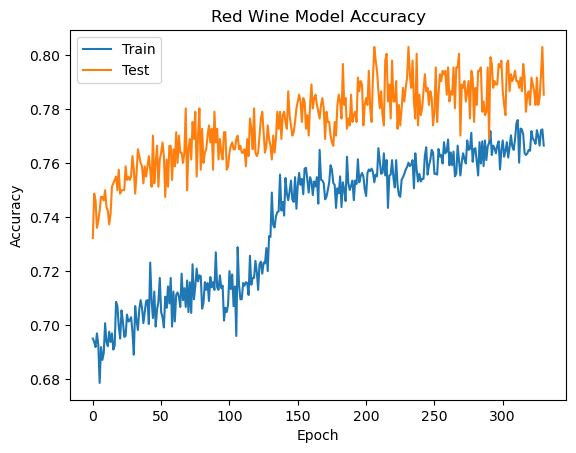

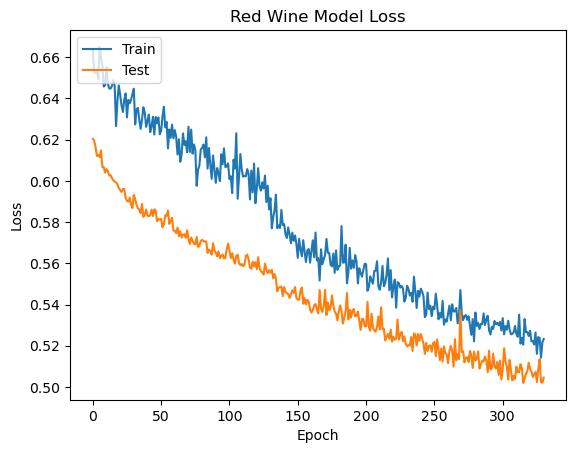

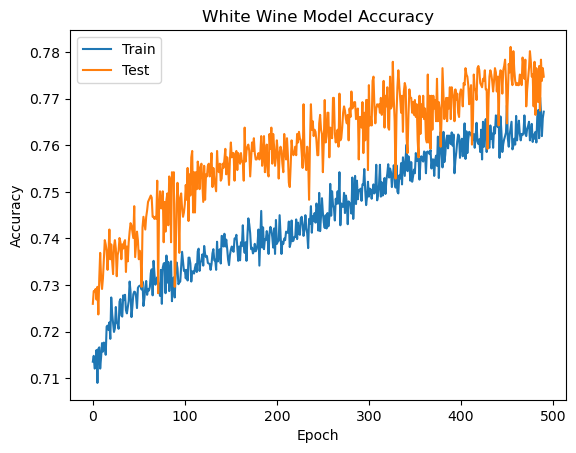

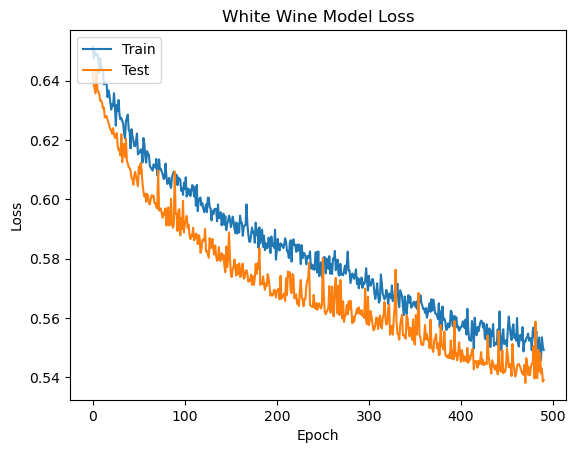

In [21]:
# ANN - Evaluation

# Evaluate Red Wine model
print('Red Wine')
ANNscoreTrain_red = best_red_ANNmodel.evaluate(X_red_train, y_red_train, verbose=0)
print(f"{color.GREEN}Train / Loss: {ANNscoreTrain_red[0]:5.4f}")
print(f"Train / Accuracy: {ANNscoreTrain_red[1]:5.4f}{color.OFF}")
ANNscoreEval_red = best_red_ANNmodel.evaluate(X_red_test, y_red_test, verbose=0)
print(f"{color.BLUE}Test / Loss: {ANNscoreEval_red[0]:5.4f}")
print(f"Test / Accuracy: {ANNscoreEval_red[1]:5.4f}{color.OFF}")

# Evaluate White Wine model
print('\nWhite Wine')
ANNscoreTrain_white = best_white_ANNmodel.evaluate(X_white_train, y_white_train, verbose=0)
print(f"{color.GREEN}Train / Loss: {ANNscoreTrain_white[0]:5.4f}")
print(f"Train / Accuracy: {ANNscoreTrain_white[1]:5.4f}{color.OFF}")
ANNscoreEval_white = best_white_ANNmodel.evaluate(X_white_test, y_white_test, verbose=0)
print(f"{color.BLUE}Test / Loss: {ANNscoreEval_white[0]:5.4f}")
print(f"Test / Accuracy: {ANNscoreEval_white[1]:5.4f}{color.OFF}")

def plot_model_history(history, title):
        
    # Check if the history is a Keras History object or a plain dictionary
    if isinstance(history, dict):
        history_data = history
    else:
        history_data = history.history
        
    # Plot training & validation accuracy values
    plt.plot(history_data['accuracy'])
    plt.plot(history_data['val_accuracy'])
    plt.title(title + ' Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history_data['loss'])
    plt.plot(history_data['val_loss'])
    plt.title(title + ' Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Plot the history for the red wine model
plot_model_history(ANNhistory_red, 'Red Wine')

# Plot the history for the white wine model
plot_model_history(ANNhistory_white, 'White Wine')

## Summary of ANN Performance

### Red Wine
The Artificial Neural Network (ANN) trained on the Red Wine dataset has demonstrated a promising level of performance. The accuracies on the training and testing sets are closely aligned, which suggests that the model is generalizing well without significant overfitting or underfitting. The convergence of loss and accuracy over the epochs indicates that the model's learning has stabilized, and further training might yield only marginal improvements. The training process appears to have found a balance in terms of learning rate and model complexity, as evidenced by the minor fluctuations in performance metrics.

### White Wine
For the White Wine dataset, the ANN has shown a commendable level of effectiveness in the classification task. The training and testing accuracies are in close proximity, indicating that the model is generalizing well to unseen data. The training graphs display a stable convergence over time, suggesting that the model has reached an optimal level of learning where additional training may not yield significant performance gains. The minor fluctuations observed in the accuracy graph are typical of ANN training processes and do not raise concerns of overfitting.


69/69 [==============================] - 0s 907us/step


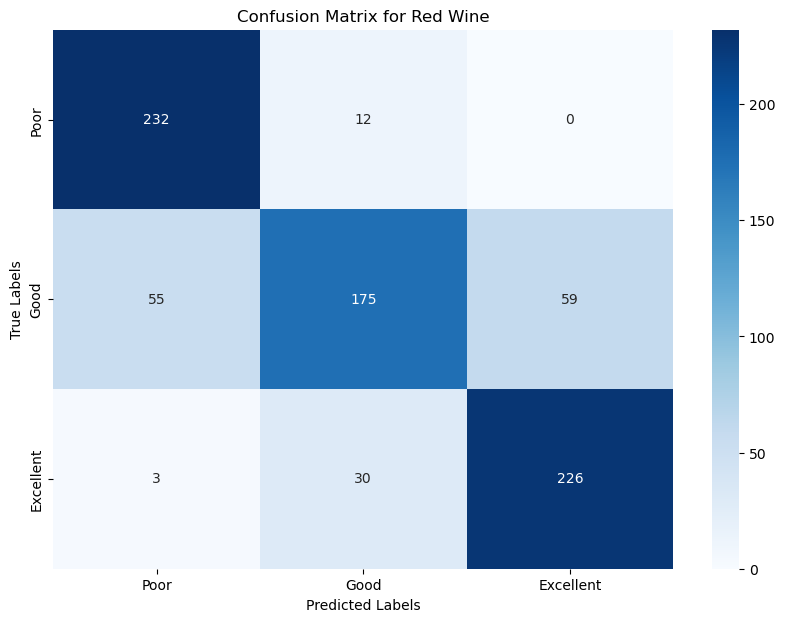

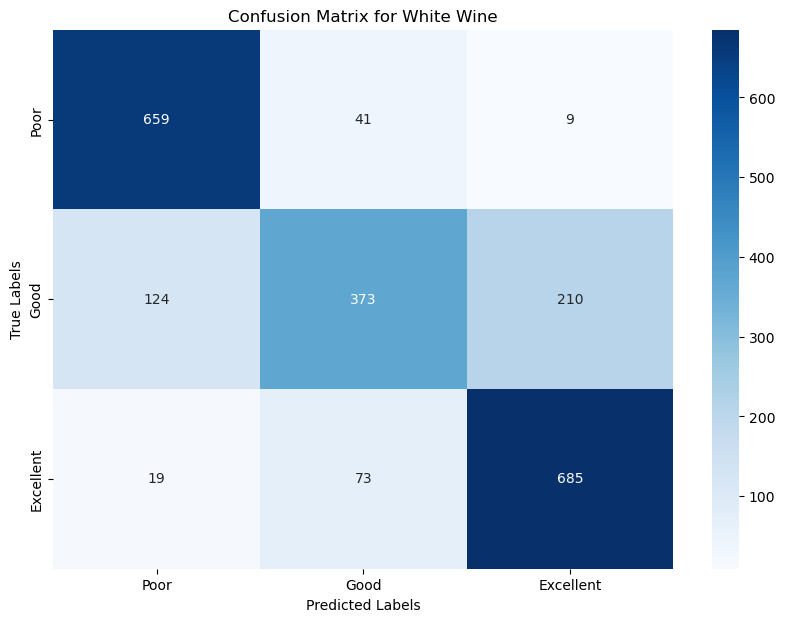

In [22]:
# ANN - Confusion Matrix

# Prediction for Red Wine
pred_labels_one_hot_red = best_red_ANNmodel.predict(X_red_test)
pred_labels_red = np.argmax(pred_labels_one_hot_red, axis=1)
true_labels_red = np.argmax(y_red_test, axis=1)

# Calculate the confusion matrix for Red Wine
conf_matrix_red = confusion_matrix(true_labels_red, pred_labels_red)

# Prediction for White Wine
pred_labels_one_hot_white = best_white_ANNmodel.predict(X_white_test)
pred_labels_white = np.argmax(pred_labels_one_hot_white, axis=1)
true_labels_white = np.argmax(y_white_test, axis=1)

# Calculate the confusion matrix for White Wine
conf_matrix_white = confusion_matrix(true_labels_white, pred_labels_white)

# Plotting the heatmap for Red Wine
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_red, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Poor', 'Good', 'Excellent'], 
            yticklabels=['Poor', 'Good', 'Excellent'])
plt.title('Confusion Matrix for Red Wine')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Plotting the heatmap for White Wine
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_white, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Poor', 'Good', 'Excellent'], 
            yticklabels=['Poor', 'Good', 'Excellent'])
plt.title('Confusion Matrix for White Wine')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


## Confusion Matrix Analysis for Red Wine Classification

The confusion matrix visualizes the model's performance and shows a strong ability to distinguish between the three classes, with a particular strength in identifying 'Poor' and 'Excellent' categories. It indicates that most predictions fall on the diagonal, which represents correct classifications. 

'Good' category predictions show a higher rate of confusion with both 'Poor' and 'Excellent', suggesting that 'Good' characteristics may not be as distinct or may overlap with features of the other classes. 

Overall, the model demonstrates a commendable classification capability, although there is room for improvement, especially in reducing the misclassification of 'Good'.

## Confusion Matrix Analysis for White Wine Classification

There are areas where the model shows some confusion, particularly between 'Good' and 'Excellent' categories. This suggests that some characteristics of 'Good' and 'Excellent' wines may overlap, or that the model requires further fine-tuning to better distinguish between these categories.

Overall, the model appears competent at classifying white wine quality.



In [23]:
################################################################################
################################################################################


# Deep Learning - Definition and Tuning for Classification

def DLmodel(hp):
    model = Sequential()
    
    # Input layer with 11 neurons (one for each chemical feature)
    model.add(layers.Dense(11, activation='relu', input_shape=(11,)))
    
    # First hidden layer with tunable number of neurons
    model.add(layers.Dense(
        units=hp.Choice('units_hidden_layer_1', [64, 128, 256]),
        activation='relu'
    ))
    
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))
    
    # Second hidden layer with tunable number of neurons
    model.add(layers.Dense(
        units=hp.Choice('units_hidden_layer_2', [64, 128, 256]),
        activation='relu'
    ))
    
    model.add(Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)))
    
    # Third hidden layer with tunable number of neurons
    model.add(layers.Dense(
        units=hp.Choice('units_hidden_layer_3', [64, 128, 256]),
        activation='relu'
    ))
    
    model.add(Dropout(hp.Float('dropout_3', 0.2, 0.5, step=0.1)))
    
    # Output layer for multiclass classification with 3 neurons (one for each class)
    model.add(layers.Dense(3, activation='softmax'))
    
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


# Ensure that the directory exists
directory = 'C:/mydir/DL/'
if not os.path.exists(directory):
    os.makedirs(directory)

# Deep Learning Model Tuner for Red Wine
DLred_tuner = RandomSearch(
    DLmodel,
    objective='val_accuracy',
    max_trials=5, 
    executions_per_trial=1,
    directory=os.path.normpath(directory),
    project_name='dl_redwine'
)

# Execute the search over the specified number of epochs and batch size
DLred_tuner.search(X_red_train, y_red_train,
                   epochs=50,
                   batch_size=32,
                   validation_data=(X_red_test, y_red_test))

# Get the best red wine model
best_red_DLmodel = DLred_tuner.get_best_models(num_models=1)[0]
best_red_DLmodel.save('C:/mydir/DL/bestmodel/red/')

# Deep Learning Model Tuner for White Wine
DLwhite_tuner = RandomSearch(
    DLmodel,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1, 
    directory=os.path.normpath(directory),
    project_name='dl_whitewine'
)

DLwhite_tuner.search(X_white_train, y_white_train,
                     epochs=50,
                     batch_size=32,
                     validation_data=(X_white_test, y_white_test))

# Get the best white wine model
best_white_DLmodel = DLwhite_tuner.get_best_models(num_models=1)[0]
best_white_DLmodel.save('C:/mydir/DL/bestmodel/white/')

# Print a summary of the best DL model for red wine
print("Best Red Wine DL Model Summary:")
best_red_DLmodel.summary()

# Print the hyperparameters of the best DL model for red wine
best_red_DLhyperparameters = DLred_tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters for red wine DL model:")
print(best_red_DLhyperparameters.values)

# Evaluate the best DL model on the test set and print the accuracy
best_red_DL_accuracy = best_red_DLmodel.evaluate(X_red_test, y_red_test)[1]
print(f"Best Red Wine DL Model Accuracy: {best_red_DL_accuracy:.2f}")

# Print a summary of the best DL model for white wine
print("Best White Wine DL Model Summary:")
best_white_DLmodel.summary()

# Print the hyperparameters of the best DL model for white wine
best_white_DLhyperparameters = DLwhite_tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters for white wine DL model:")
print(best_white_DLhyperparameters.values)

# Evaluate the best DL model on the test set and print the accuracy
best_white_DL_accuracy = best_white_DLmodel.evaluate(X_white_test, y_white_test)[1]
print(f"Best White Wine DL Model Accuracy: {best_white_DL_accuracy:.2f}")


Reloading Tuner from C:\mydir\DL\dl_redwine\tuner0.json


INFO:tensorflow:Assets written to: C:/mydir/DL/bestmodel/red/assets


INFO:tensorflow:Assets written to: C:/mydir/DL/bestmodel/red/assets


Reloading Tuner from C:\mydir\DL\dl_whitewine\tuner0.json
INFO:tensorflow:Assets written to: C:/mydir/DL/bestmodel/white/assets


INFO:tensorflow:Assets written to: C:/mydir/DL/bestmodel/white/assets


Best Red Wine DL Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)    

## Best Red Wine Model (DL)

**Accuracy**: 88%

**Best Hyperparameters**:
- Number of Hidden Layers: 3
- Units in Hidden Layers: 128, 128, 128
- Dropout Rates: 0.2, 0.3, 0.2
- Optimizer: Adam

**Model Summary**:
- Input Layer: 11 neurons
- Hidden Layers and Dropout:
  - 1st Hidden Layer: 128 neurons (Dense) with Dropout: 0.2
  - 2nd Hidden Layer: 128 neurons (Dense) with Dropout: 0.3
  - 3rd Hidden Layer: 128 neurons (Dense) with Dropout: 0.2
- Output Layer: 3 neurons (Dense)

## Best White Wine Model (DL)

**Accuracy**: 86%

**Best Hyperparameters**:
- Number of Hidden Layers: 3
- Units in Hidden Layers: 256, 256, 64
- Dropout Rates: 0.2, 0.4, 0.3
- Optimizer: Adam

**Model Summary**:
- Input Layer: 11 neurons
- Hidden Layers and Dropout:
  - 1st Hidden Layer: 256 neurons (Dense) with Dropout: 0.2
  - 2nd Hidden Layer: 256 neurons (Dense) with Dropout: 0.4
  - 3rd Hidden Layer: 64 neurons (Dense) with Dropout: 0.3
- Output Layer: 3 neurons (Dense)

In [24]:
# DL - Training

# Paths for models and histories
DLmodel_path_red = directory + 'best_red_DLmodel.keras'
DLhistory_path_red = directory + 'best_red_DLhistory.json'

DLmodel_path_white = directory + 'best_white_DLmodel.keras'
DLhistory_path_white = directory + 'best_white_DLhistory.json'

# Check if the model for Red Wine already exists
if not os.path.exists(DLmodel_path_red):
    # Train ANN for Red Wine
    DLhistory_red = best_red_DLmodel.fit(
        X_red_train, y_red_train,
        epochs=150, batch_size=32, verbose=1,
        validation_data=(X_red_test, y_red_test)
        #callbacks=[early_stopping_red]   # early stopping was removed because the training stopped too early
    )
    # Save the trained model
    best_red_DLmodel.save(DLmodel_path_red)
    # Save the history
    save_history(DLhistory_red, DLhistory_path_red)
else:
    print("Model for Red Wine already trained and saved.")
    # Load the model if the model was already trained
    best_red_DLmodel = load_model(DLmodel_path_red)
    # Load the history if the model was already trained
    DLhistory_red = load_history(DLhistory_path_red)

# Check if the model for White Wine already exists
if not os.path.exists(DLmodel_path_white):
    # Train ANN for White Wine
    DLhistory_white = best_white_DLmodel.fit(
        X_white_train, y_white_train,
        epochs=400, batch_size=32, verbose=1,
        validation_data=(X_white_test, y_white_test)
        #callbacks=[early_stopping_white] # early stopping was removed because the training stopped too early
    )
    # Save the trained model
    best_white_DLmodel.save(DLmodel_path_white)
    # Save the history
    save_history(DLhistory_white, DLhistory_path_white)
else:
    print("Model for White Wine already trained and saved.")
    # Load the model if the model was already trained
    best_white_DLmodel = load_model(DLmodel_path_white)
    # Load the history if the model was already trained
    DLhistory_white = load_history(DLhistory_path_white)


Model for Red Wine already trained and saved.
Model for White Wine already trained and saved.


Red Wine
Train / Loss: 0.0818
Train / Accuracy: 0.9719
Test / Loss: 0.2058
Test / Accuracy: 0.9369

White Wine
Train / Loss: 0.0752
Train / Accuracy: 0.9710
Test / Loss: 0.2963
Test / Accuracy: 0.9138


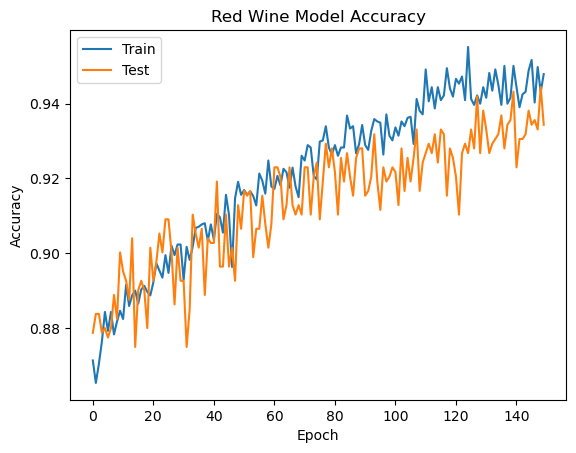

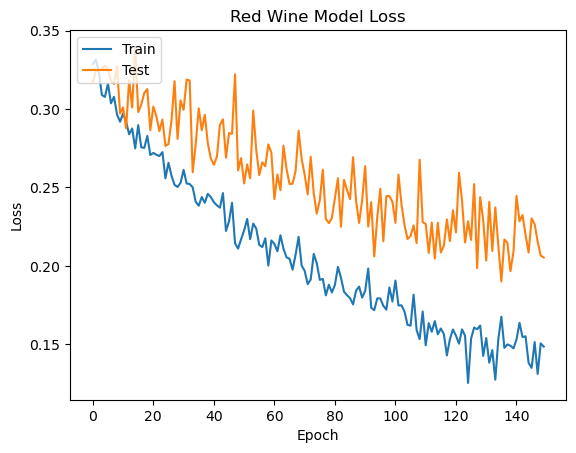

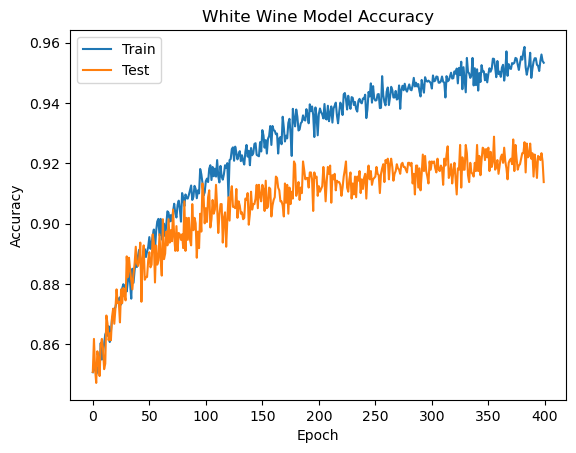

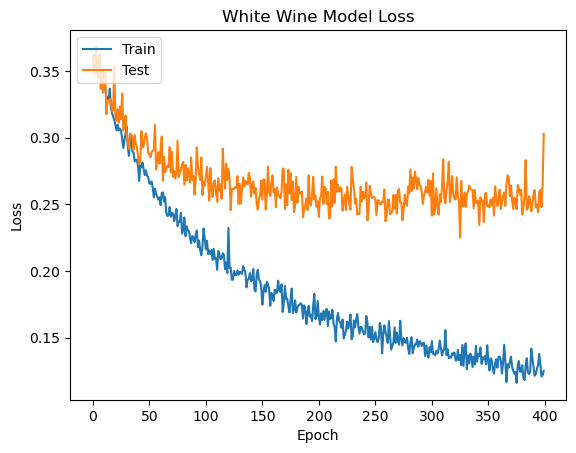

In [25]:
# DL - Evaluation

# Evaluate Red Wine model
print('Red Wine')
DLscoreTrain_red = best_red_DLmodel.evaluate(X_red_train, y_red_train, verbose=0)
print(f"{color.GREEN}Train / Loss: {DLscoreTrain_red[0]:5.4f}")
print(f"Train / Accuracy: {DLscoreTrain_red[1]:5.4f}{color.OFF}")
DLscoreEval_red = best_red_DLmodel.evaluate(X_red_test, y_red_test, verbose=0)
print(f"{color.BLUE}Test / Loss: {DLscoreEval_red[0]:5.4f}")
print(f"Test / Accuracy: {DLscoreEval_red[1]:5.4f}{color.OFF}")

# Evaluate White Wine model
print('\nWhite Wine')
DLscoreTrain_white = best_white_DLmodel.evaluate(X_white_train, y_white_train, verbose=0)
print(f"{color.GREEN}Train / Loss: {DLscoreTrain_white[0]:5.4f}")
print(f"Train / Accuracy: {DLscoreTrain_white[1]:5.4f}{color.OFF}")
DLscoreEval_white = best_white_DLmodel.evaluate(X_white_test, y_white_test, verbose=0)
print(f"{color.BLUE}Test / Loss: {DLscoreEval_white[0]:5.4f}")
print(f"Test / Accuracy: {DLscoreEval_white[1]:5.4f}{color.OFF}")


# Plot the history for the red wine model
plot_model_history(DLhistory_red, 'Red Wine')

# Plot the history for the white wine model
plot_model_history(DLhistory_white, 'White Wine')


## Summary of ANN (deep learning approach) Performance

### Red Wine
The Red Wine model presents a strong learning capability as seen by a steady increase in training accuracy. However, the test accuracy reveals a plateau, a potential sign of overfitting. This is further indicated by the loss graphs where the training loss consistently decreases, yet the test loss appears to level off with a noticeable gap from the training loss.

### White Wine
The White Wine model displays a promising learning curve with a consistent increase in training accuracy, suggesting effective learning from the data. However, the test accuracy plateaus at a lower level than the training accuracy, which may hint at some degree of overfitting. This is further evidenced by the loss trends, where the training loss decreases significantly while the test loss doesn't show a similar downward trend. 


## Simple ANN vs deep learning approach
From the above graphs, we observe that a deep learning approach leads to overfitting, making a simple ANN model a better fit for the datasets under consideration. Early Stopping for the deep learning model was removed to highlight this issue, where the model increasingly overfits to the training data, continuously improving accuracy with each epoch on the training set while remaining stable on the test set.



69/69 [==============================] - 0s 876us/step


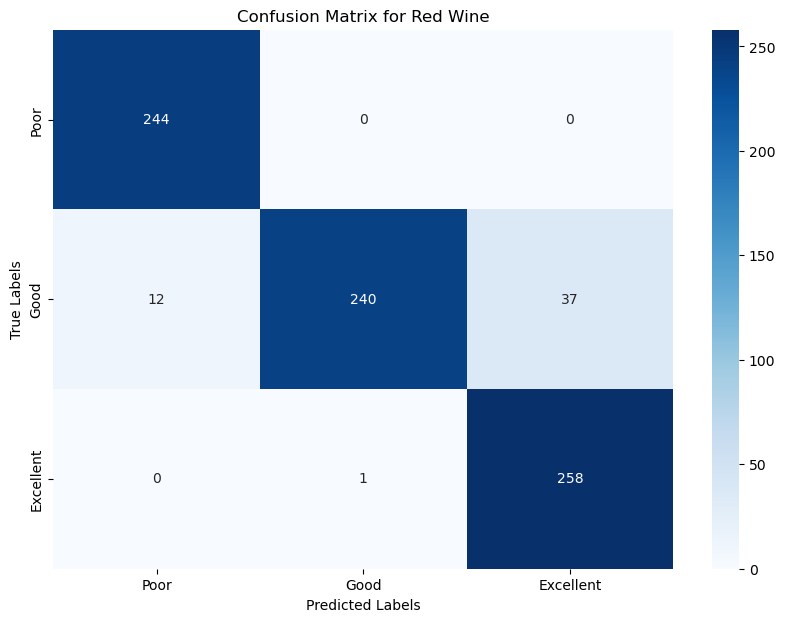

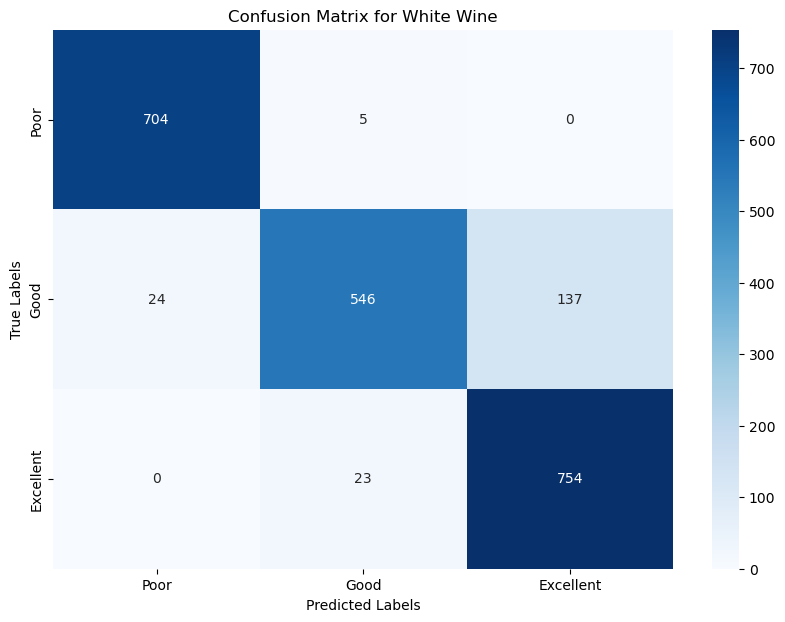

In [26]:
# DL - Confusion Matrix


# Prediction for Red Wine
pred_labels_one_hot_red = best_red_DLmodel.predict(X_red_test)
pred_labels_red = np.argmax(pred_labels_one_hot_red, axis=1)
true_labels_red = np.argmax(y_red_test, axis=1)

# Calculate the confusion matrix for Red Wine
conf_matrix_red = confusion_matrix(true_labels_red, pred_labels_red)

# Prediction for White Wine
pred_labels_one_hot_white = best_white_DLmodel.predict(X_white_test)
pred_labels_white = np.argmax(pred_labels_one_hot_white, axis=1)
true_labels_white = np.argmax(y_white_test, axis=1)

# Calculate the confusion matrix for White Wine
conf_matrix_white = confusion_matrix(true_labels_white, pred_labels_white)

# Plotting the heatmap for Red Wine
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_red, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Poor', 'Good', 'Excellent'], 
            yticklabels=['Poor', 'Good', 'Excellent'])
plt.title('Confusion Matrix for Red Wine')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Plotting the heatmap for White Wine
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_white, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Poor', 'Good', 'Excellent'], 
            yticklabels=['Poor', 'Good', 'Excellent'])
plt.title('Confusion Matrix for White Wine')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

## Confusion Matrix

### Red Wine 

The confusion matrix for the red wine model indicates a strong predictive performance. The majority of actual classes align with the predicted classes, suggesting a high level of accuracy. Specifically, the model excels at identifying 'poor' and 'excellent' quality wines, with a very high rate of true positives. There are minimal misclassifications between 'poor' and 'good' classes, demonstrating the model's ability to distinguish between these categories effectively. However, there is some confusion between 'good' and 'excellent' wines

### White Wine

The confusion matrix for the white wine model also shows a commendable predictive capability, with a large proportion of correct predictions across all quality categories. This model is particularly adept at identifying 'poor' quality wines, with a substantial number of true positives. The 'excellent' quality prediction is also strong, but there is a noticeable number of misclassifications where 'good' wines are predicted as 'excellent'.


10/10 [==============================] - 0s 1ms/step
Fold 1, Red Wine Accuracy: 0.83125, White Wine Accuracy: 0.771875
10/10 [==============================] - 0s 954us/step
Fold 2, Red Wine Accuracy: 0.846875, White Wine Accuracy: 0.796875
10/10 [==============================] - 0s 1ms/step
Fold 3, Red Wine Accuracy: 0.84375, White Wine Accuracy: 0.7625


10/10 [==============================] - 0s 1ms/step
Fold 4, Red Wine Accuracy: 0.83125, White Wine Accuracy: 0.771875
10/10 [==============================] - 0s 1ms/step
Fold 5, Red Wine Accuracy: 0.8495297805642633, White Wine Accuracy: 0.7554858934169278


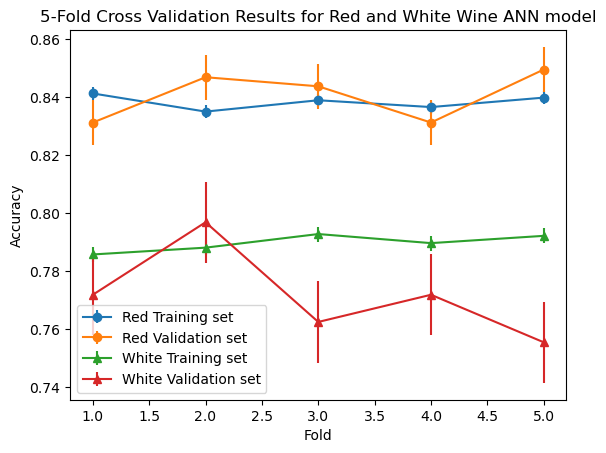

In [27]:
# 5-fold cross validation

# Number of unique classes in y_red
num_classes = len(np.unique(y_red))

# Convert y_red and y_white to the one-hot encoding.
y_red_one_hot = to_categorical(y_red, num_classes=len(np.unique(y_red)))
y_white_one_hot = to_categorical(y_white, num_classes=len(np.unique(y_white)))

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 0

# Lists to collect the results for red and white wines
results = {
    'red': {'training_scores': [], 'validation_scores': []},
    'white': {'training_scores': [], 'validation_scores': []}
}

for train_index, test_index in kf.split(X_red):
    fold += 1
    # For red wine
    X_red_train_cv, X_red_test_cv = X_red.iloc[train_index], X_red.iloc[test_index]
    y_red_train_cv, y_red_test_cv = y_red_one_hot[train_index], y_red_one_hot[test_index]

    # Reload the best model for red wine found by Keras Tuner.
    model_red = load_model('C:/mydir/ANN/bestmodel/red/')
    history_red = model_red.fit(X_red_train_cv, y_red_train_cv,
                                epochs=150, batch_size=32, verbose=0)
    
    results['red']['training_scores'].append(history_red.history['accuracy'][-1])
    predictions_red = model_red.predict(X_red_test_cv)
    results['red']['validation_scores'].append(accuracy_score(y_red_test_cv.argmax(axis=1), predictions_red.argmax(axis=1)))

    # For white wine
    X_white_train_cv, X_white_test_cv = X_white.iloc[train_index], X_white.iloc[test_index]
    y_white_train_cv, y_white_test_cv = y_white_one_hot[train_index], y_white_one_hot[test_index]

    # Reload the best model for white wine found by Keras Tuner.
    model_white = load_model('C:/mydir/ANN/bestmodel/white/')
    history_white = model_white.fit(X_white_train_cv, y_white_train_cv,
                                    epochs=150, batch_size=32, verbose=0)
    
    results['white']['training_scores'].append(history_white.history['accuracy'][-1])
    predictions_white = model_white.predict(X_white_test_cv)
    results['white']['validation_scores'].append(accuracy_score(y_white_test_cv.argmax(axis=1), predictions_white.argmax(axis=1)))

    print(f"Fold {fold}, Red Wine Accuracy: {results['red']['validation_scores'][-1]}, White Wine Accuracy: {results['white']['validation_scores'][-1]}")

# Plotting the results for red wine
folds = range(1, 6)
plt.errorbar(folds, results['red']['training_scores'], yerr=np.std(results['red']['training_scores']), label='Red Training set', fmt='-o')
plt.errorbar(folds, results['red']['validation_scores'], yerr=np.std(results['red']['validation_scores']), label='Red Validation set', fmt='-o')

# Plotting the results for white wine
plt.errorbar(folds, results['white']['training_scores'], yerr=np.std(results['white']['training_scores']), label='White Training set', fmt='-^')
plt.errorbar(folds, results['white']['validation_scores'], yerr=np.std(results['white']['validation_scores']), label='White Validation set', fmt='-^')

plt.title('5-Fold Cross Validation Results for Red and White Wine ANN model')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()






## Cross-Validation on the simple ANN

The performance of the models for red and white wine was assessed through cross-validation. The red wine model showed consistent performance, indicating it is well-tuned and should perform reliably on unseen data. On the other hand, the white wine model's performance varied more, suggesting that it may benefit from additional tuning to improve its consistency.